## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
from experiments.globals import CP4IM_DATASET_NAMES, SYNTH_NUM_TREES
import time
from typing import Tuple, Dict, Any
from maptree import search as maptree_search
from experiments.searchers.binary_classification_tree import BinaryClassificationTree, split
from experiments.searchers.maptree import *
from experiments.globals import get_stratified_k_folds_cp4im_dataset, get_full_cp4im_dataset, run_search, save_results
import pdb
import numpy as np
import json
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from joblib import Parallel, delayed
import itertools
from itertools import product

In [3]:
from maptree_treefarms_conv import *

In [44]:
homepath = os.getcwd() # in the maptree folder
def load_tf(filename):
    with open(f"{homepath}/{filename}", 'r') as file:
        ttt_treefarms_rset = json.load(file)
    # convert every tree to maptree 
    ttt_treefarms_rset_maptree = {k: make_bct(v) for k, v in ttt_treefarms_rset.items()}
    return (ttt_treefarms_rset, ttt_treefarms_rset_maptree)

In [ ]:
# getting data
dataset_name = CP4IM_DATASET_NAMES[13]
print(dataset_name)
data = get_full_cp4im_dataset(dataset_name)
X, y = data

tic-tac-toe


In [ ]:
# get train and test sets used for treefarms
path = os.getcwd()
ttt_X_test = pd.read_table(f"{path}/ttt_X_test.txt",
                        delimiter="\t",header=None)
ttt_X_train = pd.read_table(f"{path}/ttt_X_train.txt",
                        delimiter="\t",header=None)
ttt_y_test = pd.read_table(f"{path}/ttt_y_test.txt",
                        delimiter="\t",header=None)
ttt_y_train = pd.read_table(f"{path}/ttt_y_train.txt",
                        delimiter="\t",header=None)

In [194]:
ttt_tf_rset_1 = load_tf("ttt_tf_rset_0.01.json")
ttt_tf_rset_2 = load_tf("ttt_tf_rset_0.012.json")
ttt_tf_rset_3 = load_tf("ttt_tf_rset_0.0075.json")

In [195]:
alpha_vals = [0.1, 0.9]
beta_vals = [0.1, 0.9]
rho_vals = [(2.5,2.5)] 

grid = list(product(alpha_vals, beta_vals, rho_vals))

In [196]:
grid

[(0.1, 0.1, (2.5, 2.5)),
 (0.1, 0.9, (2.5, 2.5)),
 (0.9, 0.1, (2.5, 2.5)),
 (0.9, 0.9, (2.5, 2.5))]

In [10]:
len(grid)

4

## Get the posterior for each tree in a rashomon set for different values of alpha, beta, rho

In [63]:
def evaluate_posterior(tree, X, y, alpha, beta, rho):
    POSTERIOR = {'alpha': alpha, 'beta': beta, 'rho': rho}
    tree.fit(X, y)
    return tree.log_posterior(X, y, **POSTERIOR)

def evaluate_posterior_rset(ttt_treefarms_rset_maptree, X, y,
                            grid = grid):
    tree_keys = list(ttt_treefarms_rset_maptree.keys())
    
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_posterior)(ttt_treefarms_rset_maptree[str(tree)], X, y, a, b, r)
        for tree in ttt_treefarms_rset_maptree
        for (a, b, r) in grid
    )

    # format results into dict
    results_dict = {}
    i = 0
    for tree in tree_keys:
        for (a, b, r) in grid:
            results_dict[(tree, a, b, tuple(r))] = results[i]
            i += 1
    return results_dict

In [197]:
results_dict = evaluate_posterior_rset(ttt_tf_rset_1[1], ttt_X_train.values, ttt_y_train.values.ravel())
results_dict2 = evaluate_posterior_rset(ttt_tf_rset_2[1], ttt_X_train.values, ttt_y_train.values.ravel())
results_dict3 = evaluate_posterior_rset(ttt_tf_rset_3[1], ttt_X_train.values, ttt_y_train.values.ravel())

python(51716) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51717) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51718) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51719) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51720) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51721) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51722) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51723) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51724) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51725) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(51726) Malloc

In [245]:
# vary over rho
alpha_vals = [0.95]
beta_vals = [0.5]
rho_vals = [(2.5, 2.5), (1.5, 3.0), (3.0, 1.0)]
param_grid = list(itertools.product(alpha_vals, beta_vals, rho_vals))

In [246]:
results_dict4 = evaluate_posterior_rset(ttt_tf_rset_1[1], ttt_X_train.values, ttt_y_train.values.ravel(), param_grid)
results_dict5 = evaluate_posterior_rset(ttt_tf_rset_2[1], ttt_X_train.values, ttt_y_train.values.ravel(), param_grid)
results_dict6 = evaluate_posterior_rset(ttt_tf_rset_3[1], ttt_X_train.values, ttt_y_train.values.ravel(), param_grid)

python(6320) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6321) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6322) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6323) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6325) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6326) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6327) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6329) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(6330) MallocStackLoggin

## Finding the MAPTree for different values of alpha, beta, rho

In [133]:
# running on training set (with default params) to check for overfitting compared to treefarms
res = run(ttt_X_train.values, ttt_y_train.values.ravel())
tree_2 = res["tree"]
print(tree_2)

(((19((25(22))1(10)))7((1(4))25(16)))13((2((8(5))20(11)))26((20(23))8(17))))


In [134]:
print(parse_tree(tree_2, ttt_X_train.values, ttt_y_train.values.ravel())) # dict representation of tree

{'feature': 13, 'left': {'feature': 7, 'left': {'feature': 19, 'left': {'prediction': 1}, 'right': {'feature': 1, 'left': {'feature': 25, 'left': {'prediction': 1}, 'right': {'feature': 22, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}, 'right': {'feature': 10, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}}, 'right': {'feature': 25, 'left': {'feature': 1, 'left': {'prediction': 1}, 'right': {'feature': 4, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}, 'right': {'feature': 16, 'left': {'prediction': 1}, 'right': {'prediction': 0}}}}, 'right': {'feature': 26, 'left': {'feature': 2, 'left': {'prediction': 0}, 'right': {'feature': 20, 'left': {'feature': 8, 'left': {'prediction': 0}, 'right': {'feature': 5, 'left': {'prediction': 0}, 'right': {'prediction': 1}}}, 'right': {'feature': 11, 'left': {'prediction': 0}, 'right': {'prediction': 1}}}}, 'right': {'feature': 8, 'left': {'feature': 20, 'left': {'prediction': 0}, 'right': {'feature': 23, 'left': {'predict

In [ ]:
# function to help save results
# some stuff was saved as numpy and json did not like that
def convert_numpy(obj):
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, set):
        return list(obj)
    raise TypeError(f"Type {type(obj)} not serializable")

In [136]:
with open('maptree_dict_train.json', 'w') as file:
    json.dump(parse_tree(tree_2, ttt_X_train.values, ttt_y_train.values.ravel()), file, indent=4, default=convert_numpy)

In [ ]:
def eval_params(alpha, beta, rho, X, y):
    res = run(X, y, alpha=alpha, beta=beta, rho=rho)
    tree = res["tree"]
    score = tree.log_posterior(X, y, alpha=alpha, beta=beta, rho=rho)
    return {"alpha": alpha, "beta": beta, "rho": rho, "score": score, "tree": parse_tree(tree, X, y)}

In [169]:
maptree_res = Parallel(n_jobs=-1)(
    delayed(eval_params)(a, b, r, ttt_X_train.values, ttt_y_train.values.ravel()) for a, b, r in grid
)

python(39859) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39860) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39861) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39862) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39863) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39864) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39865) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39866) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39867) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39868) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(39869) Malloc

In [ ]:
# save results

# with open('maptree_alpha_beta_res_dict_train.json', 'w') as file:
#     json.dump(maptree_res, file, indent=4, default=convert_numpy)

In [184]:
with open(f"{homepath}/maptree_alpha_beta_res_dict_train.json", 'r') as file:
    maptree_res = json.load(file)

In [84]:
# vary over rho
alpha_vals = [0.95]
beta_vals = [0.5]
rho_vals = [(2.5, 2.5), (1.5, 3.0), (3.0, 1.0)]
param_grid = list(itertools.product(alpha_vals, beta_vals, rho_vals))

maptree_res2 = Parallel(n_jobs=-1)(
    delayed(eval_params)(a, b, r, ttt_X_train.values, ttt_y_train.values.ravel()) for a, b, r in param_grid
)

In [ ]:
# save results

# with open('maptree_rho_res_dict.json', 'w') as file:
#     json.dump(maptree_res2, file, indent=4, default=convert_numpy)

In [ ]:
with open(f"{homepath}/maptree_rho_res_train_dict.json", 'r') as file:
    maptree_res2 = json.load(file)

In [ ]:
def relabel(tree_dict):
    if not isinstance(tree_dict, dict):
        return tree_dict

    new_dict = {}
    for key, value in tree_dict.items():
        if key == "left":
            new_dict["false"] = relabel(value)
        elif key == "right":
            new_dict["true"] = relabel(value)
        else:
            new_dict[key] = relabel(value)
    return new_dict


In [ ]:
# with open('maptree_dict.json', 'w') as file:
#     json.dump(maptree_opt_tree_dict, file, indent=4, default=convert_numpy)

## Load in the treefarms objectives for the Rashomon set

In [158]:
with open(f"{homepath}/ttt_treefarms_rset_objs_0.01.json", 'r') as file:
    ttt_treefarms_rset_objs_train1 = json.load(file)

In [157]:
with open(f"{homepath}/ttt_treefarms_rset_objs_0.0075.json", 'r') as file:
    ttt_treefarms_rset_objs_train2 = json.load(file)

In [ ]:
with open(f"{homepath}/ttt_treefarms_rset_objs_0.012.json", 'r') as file:
    ttt_treefarms_rset_objs_train3 = json.load(file)

## Graphs

### Plotting for diff values of alpha and beta

In [230]:
# Getting the maptrees for different configurations 
# with the objectives obtained from the treefarms file
with open(f"{homepath}/maptree_params_dict_train.json", 'r') as file:
    maptree_params_dict_train = json.load(file)

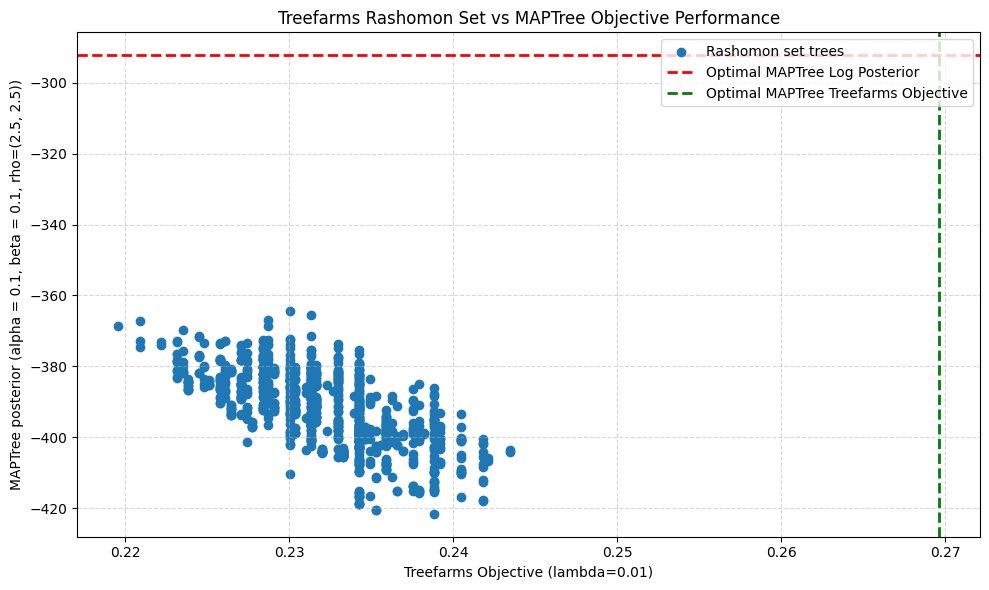

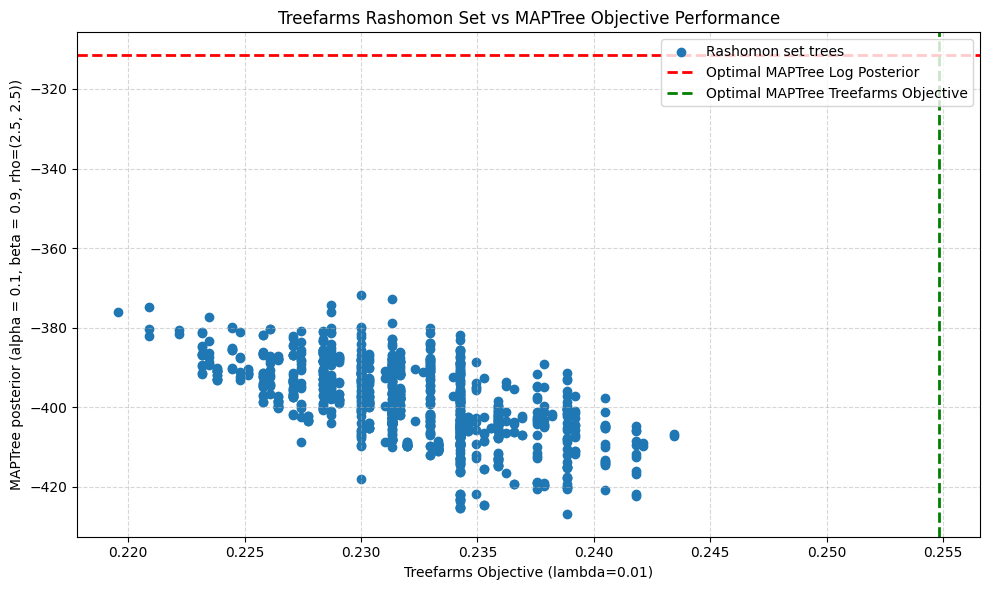

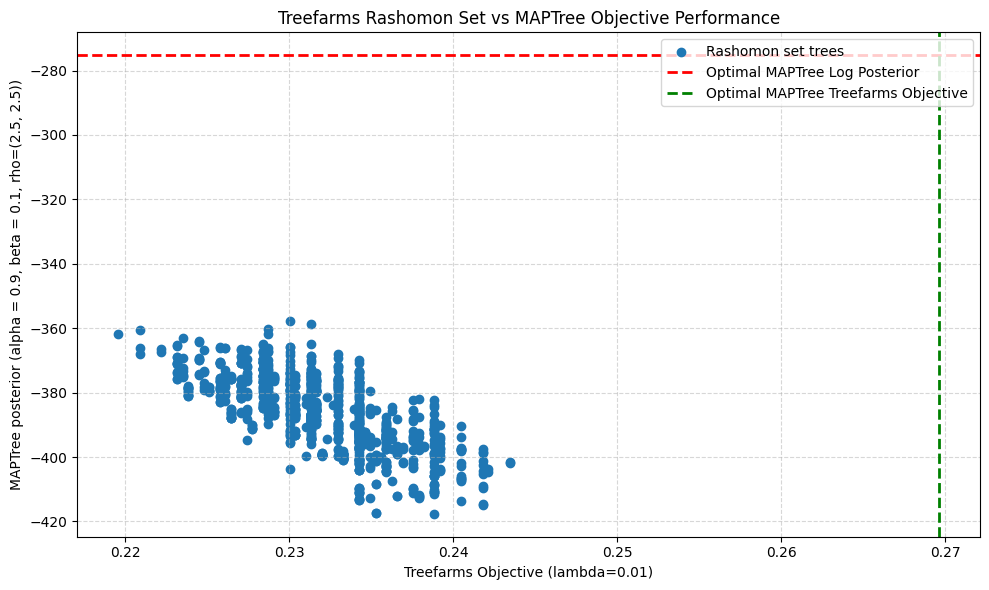

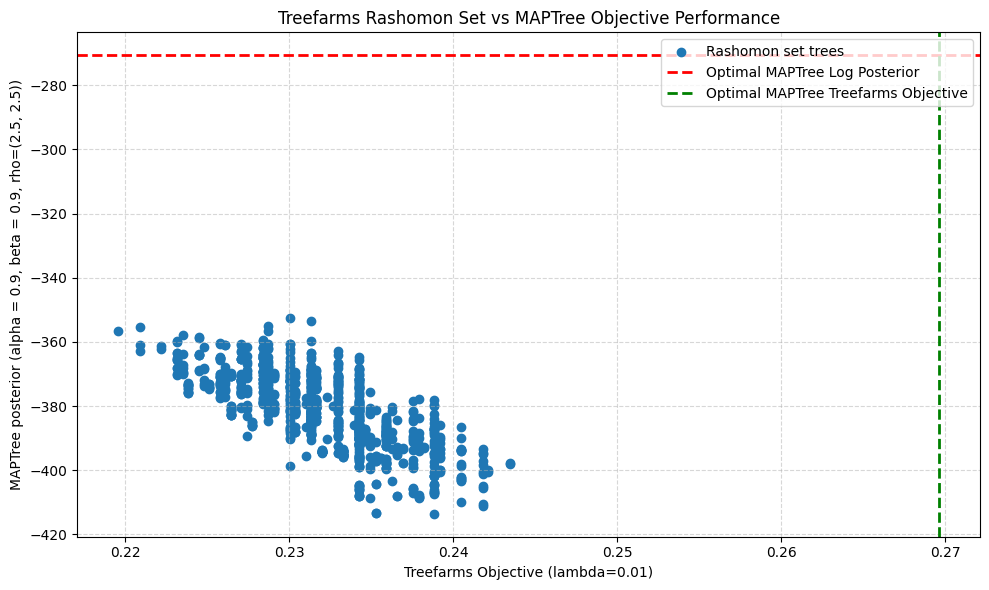

In [ ]:
# For lambda = 0.01

for i in range(len(grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i]["tf_obj"]["0.01"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = grid[i]
    filtered_dict = {
        k: v for k, v in results_dict.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train1.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.01)")
    plt.ylabel(f"MAPTree posterior (alpha = {grid[i][0]}, beta = {grid[i][1]}, rho={grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

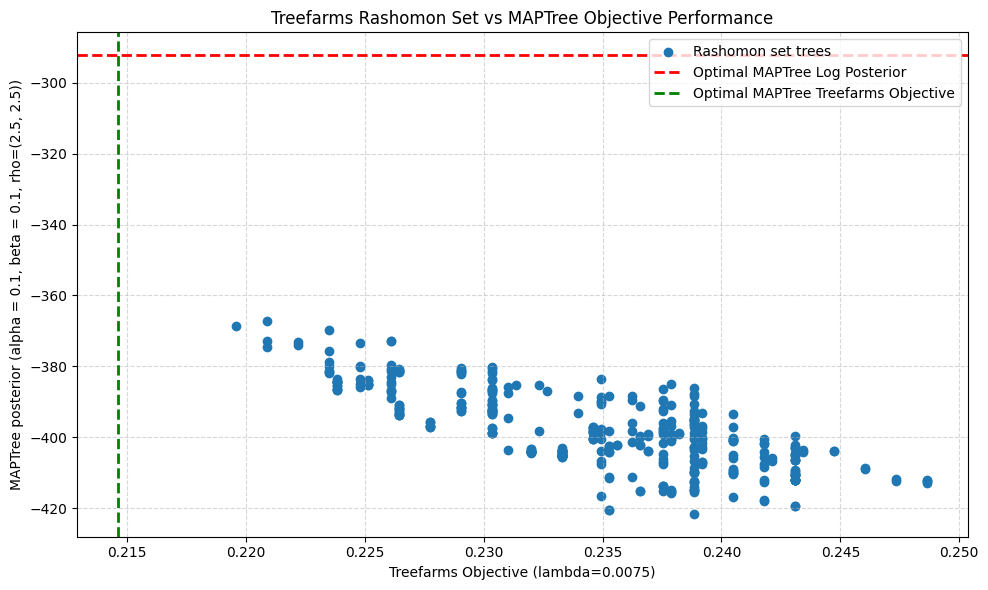

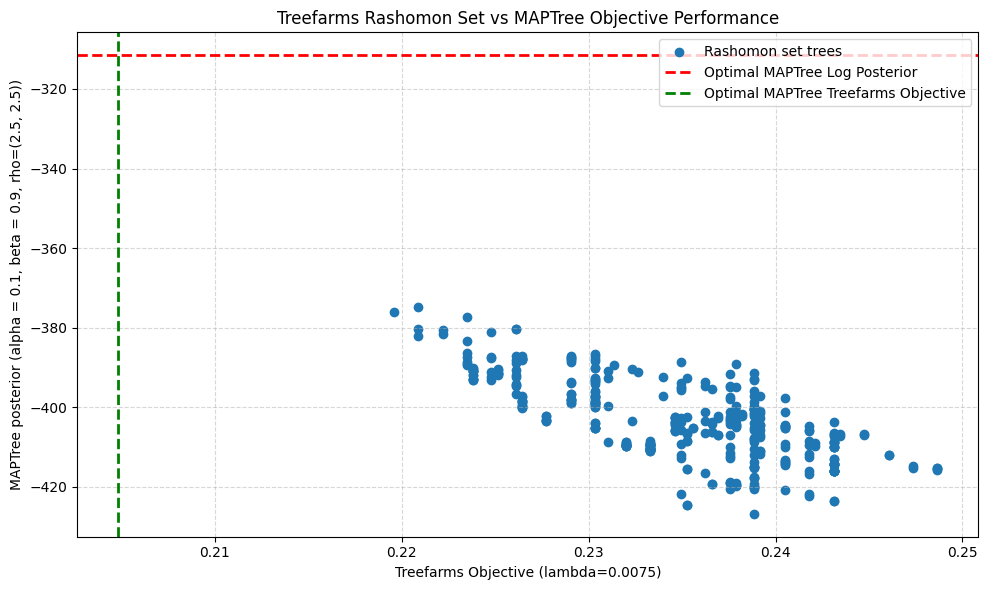

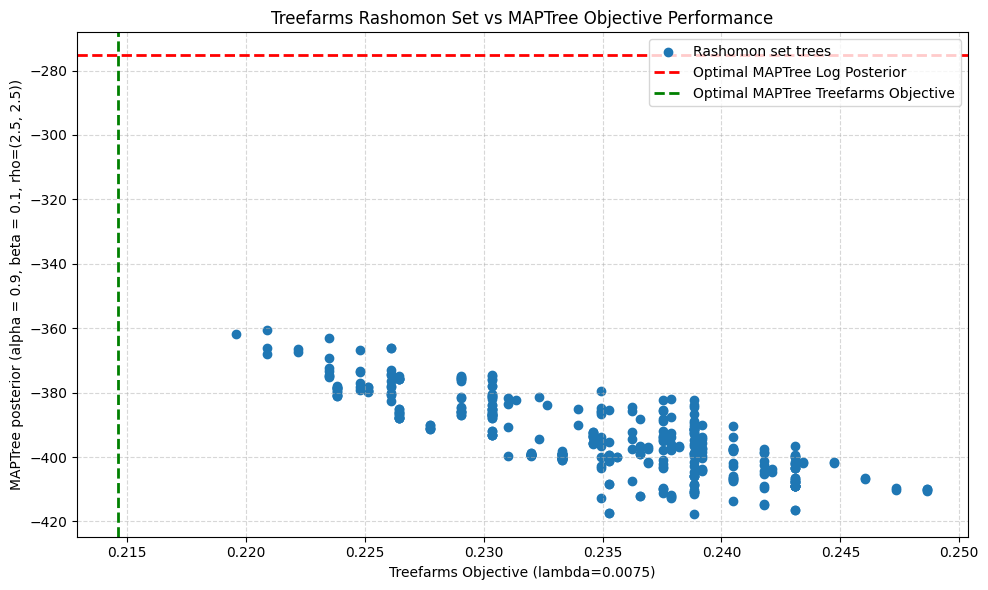

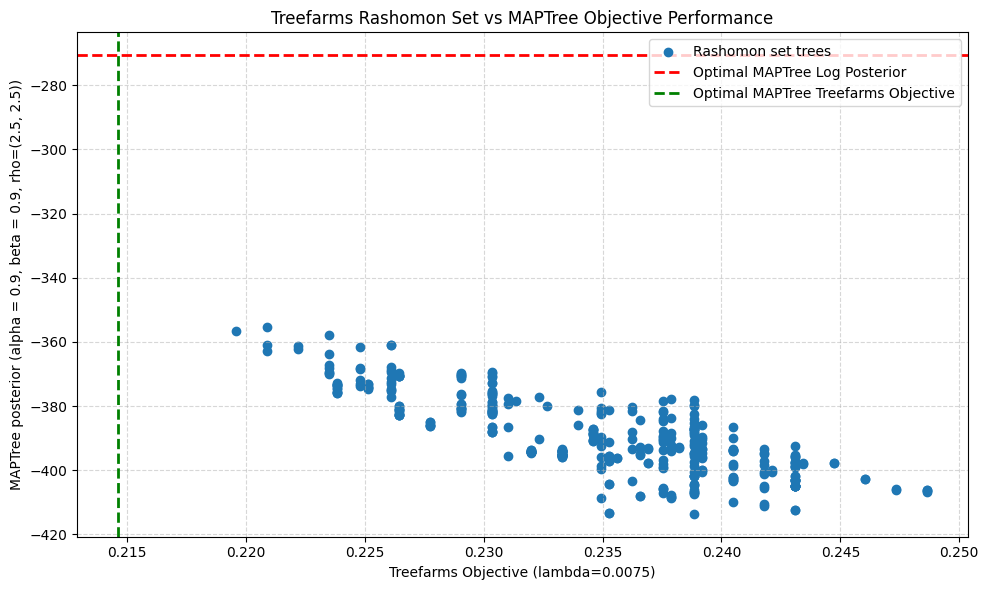

In [234]:
# For lambda = 0.0075

for i in range(len(grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i]["tf_obj"]["0.0075"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = grid[i]
    filtered_dict = {
        k: v for k, v in results_dict2.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train2.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.0075)")
    plt.ylabel(f"MAPTree posterior (alpha = {grid[i][0]}, beta = {grid[i][1]}, rho={grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

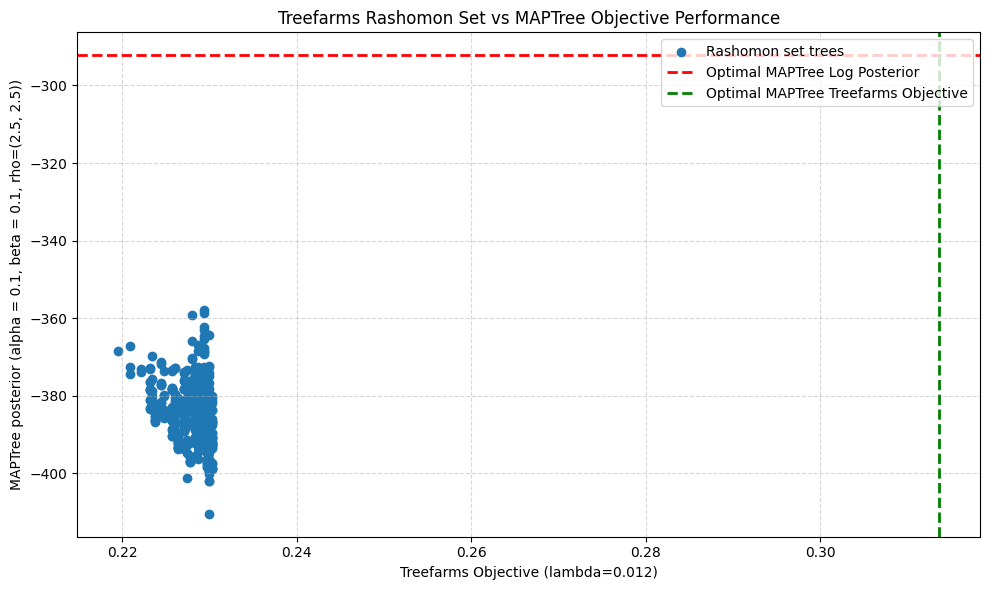

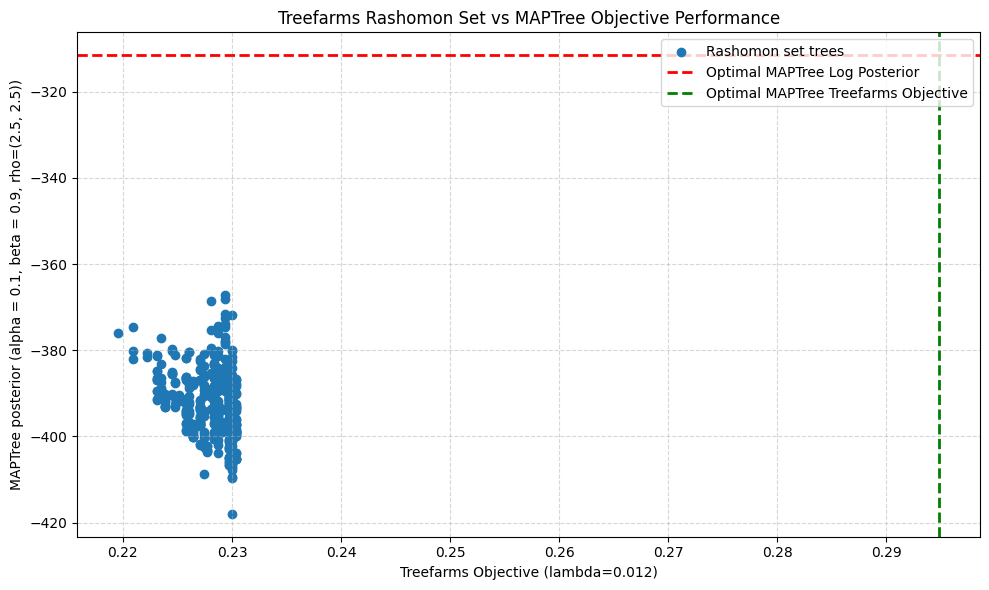

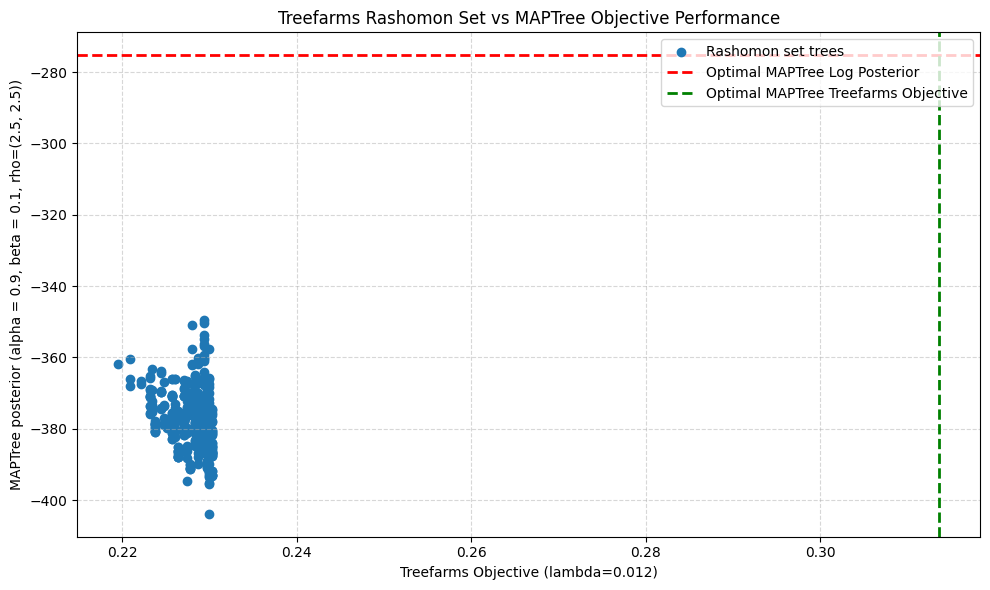

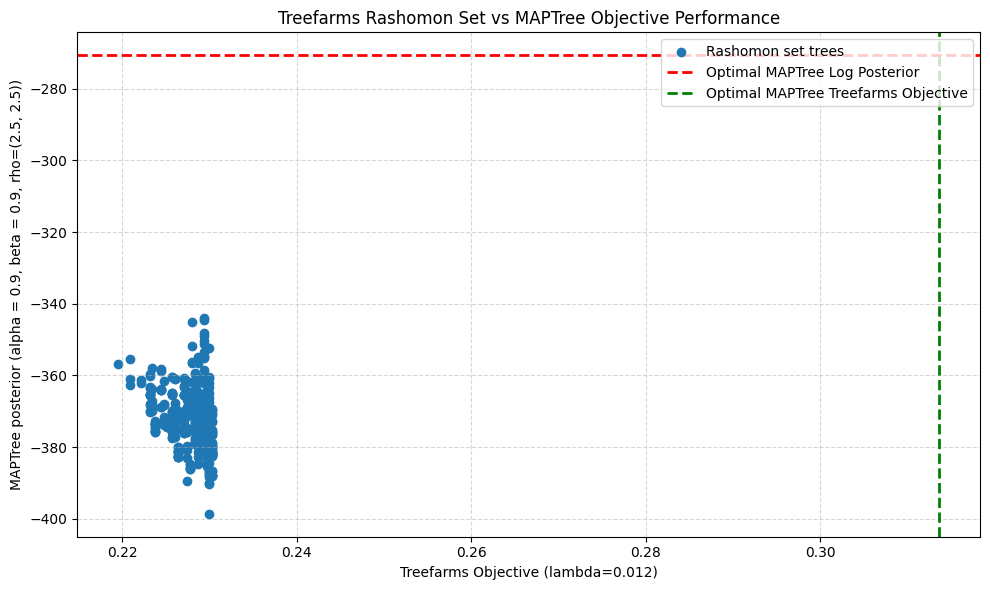

In [235]:
# For lambda = 0.012

for i in range(len(grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i]["tf_obj"]["0.012"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = grid[i]
    filtered_dict = {
        k: v for k, v in results_dict3.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train3.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.012)")
    plt.ylabel(f"MAPTree posterior (alpha = {grid[i][0]}, beta = {grid[i][1]}, rho={grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### Plotting for diff values of rho

In [236]:
param_grid

[(0.95, 0.5, (2.5, 2.5)), (0.95, 0.5, (1.5, 3.0)), (0.95, 0.5, (3.0, 1.0))]

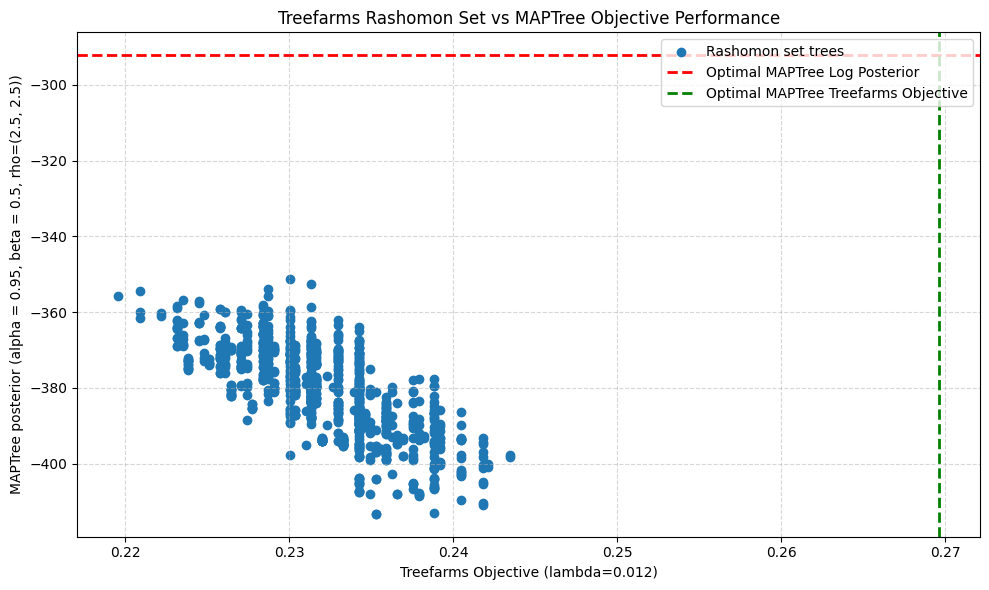

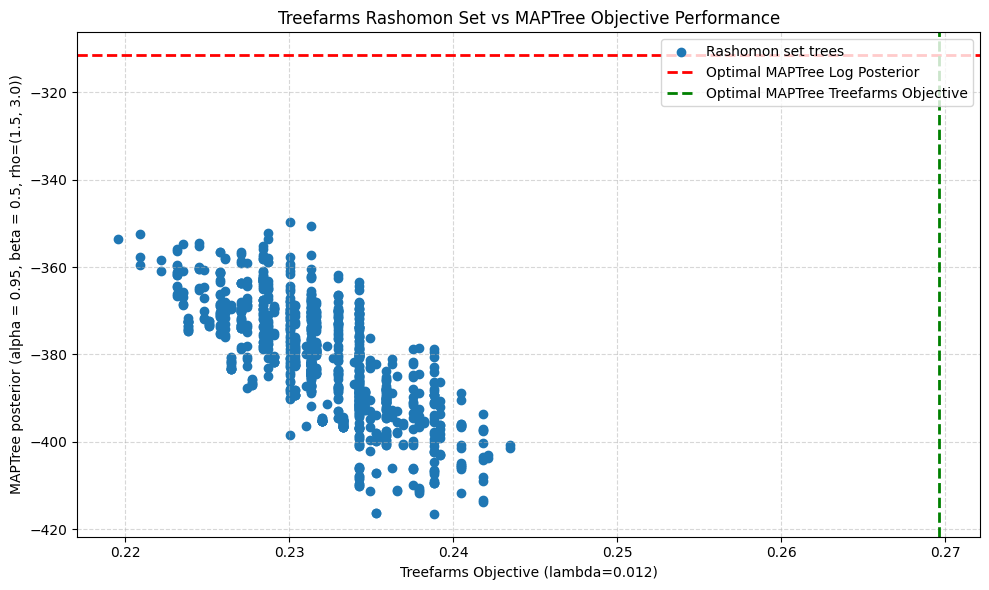

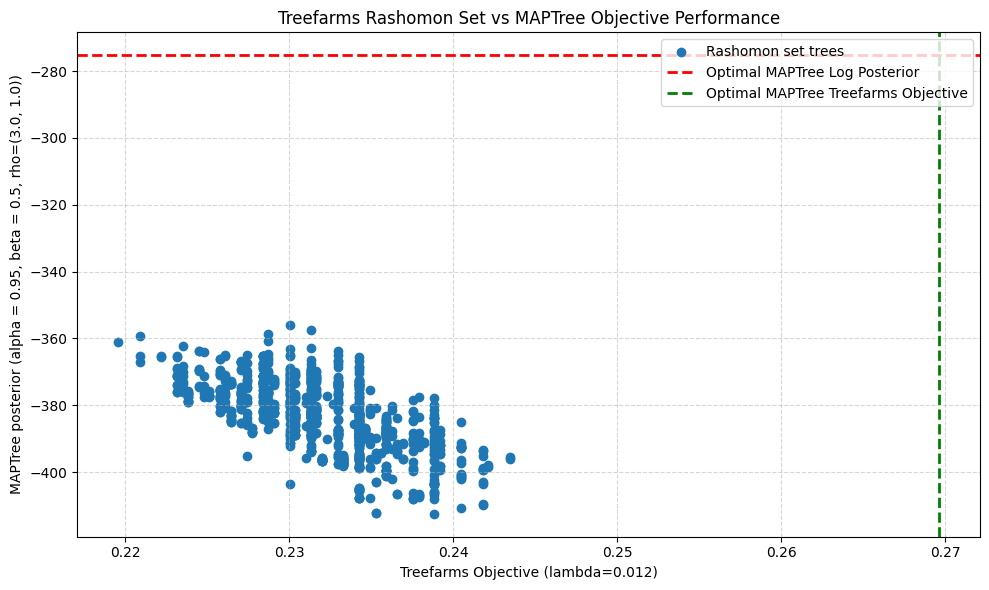

In [ ]:
# For lambda = 0.01

for i in range(len(param_grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i+4]["tf_obj"]["0.01"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = param_grid[i]
    filtered_dict = {
        k: v for k, v in results_dict4.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train1.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.01)")
    plt.ylabel(f"MAPTree posterior (alpha = {param_grid[i][0]}, beta = {param_grid[i][1]}, rho={param_grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

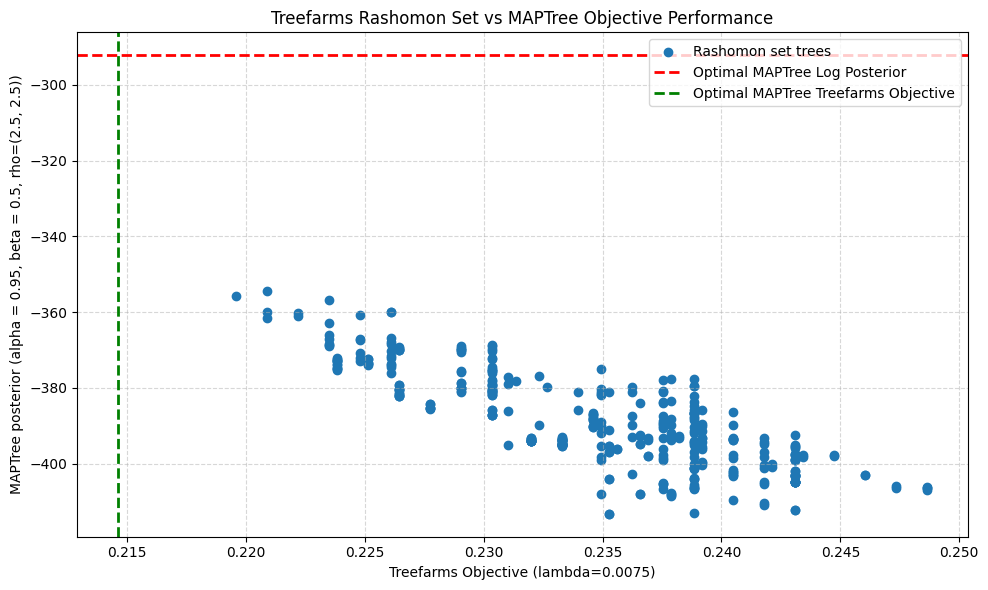

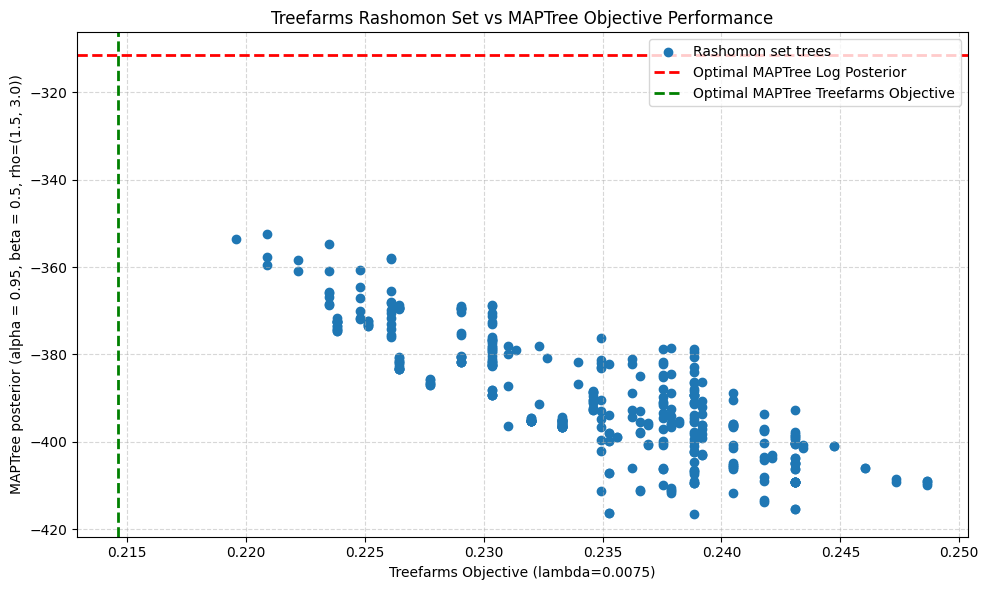

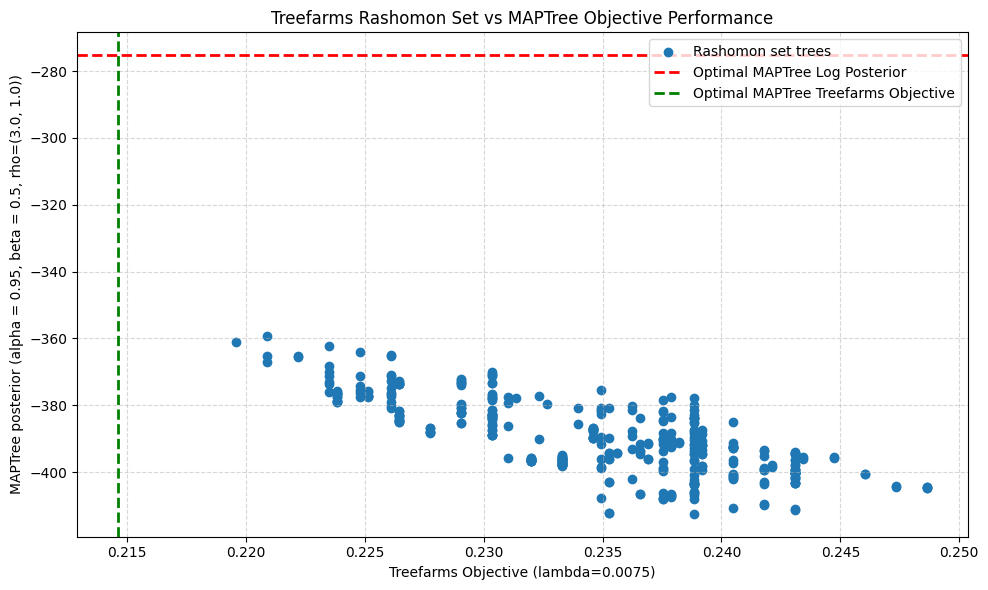

In [249]:
# For lambda = 0.0075

for i in range(len(param_grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i+4]["tf_obj"]["0.0075"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = param_grid[i]
    filtered_dict = {
        k: v for k, v in results_dict5.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train2.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.0075)")
    plt.ylabel(f"MAPTree posterior (alpha = {param_grid[i][0]}, beta = {param_grid[i][1]}, rho={param_grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

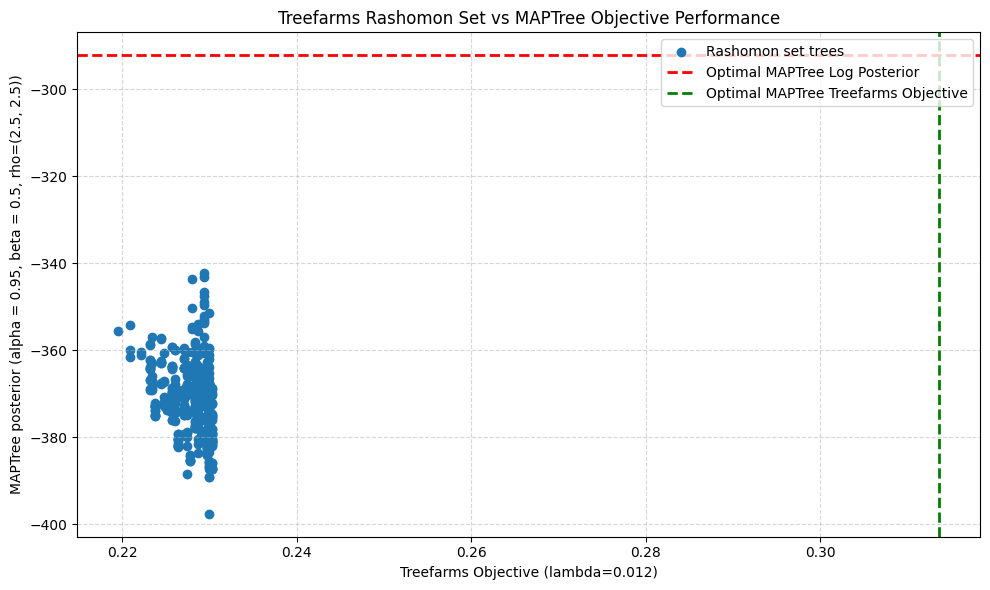

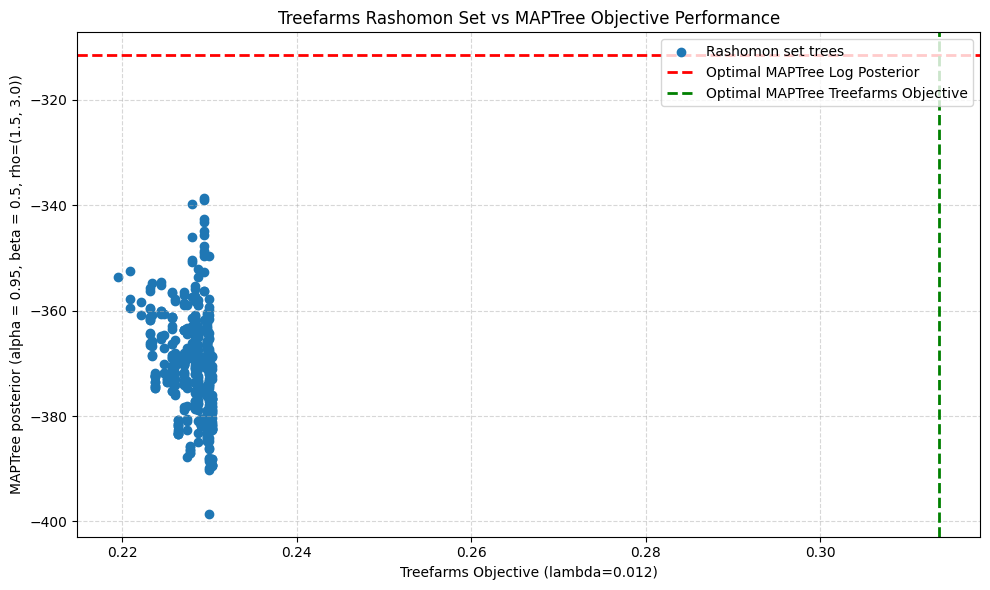

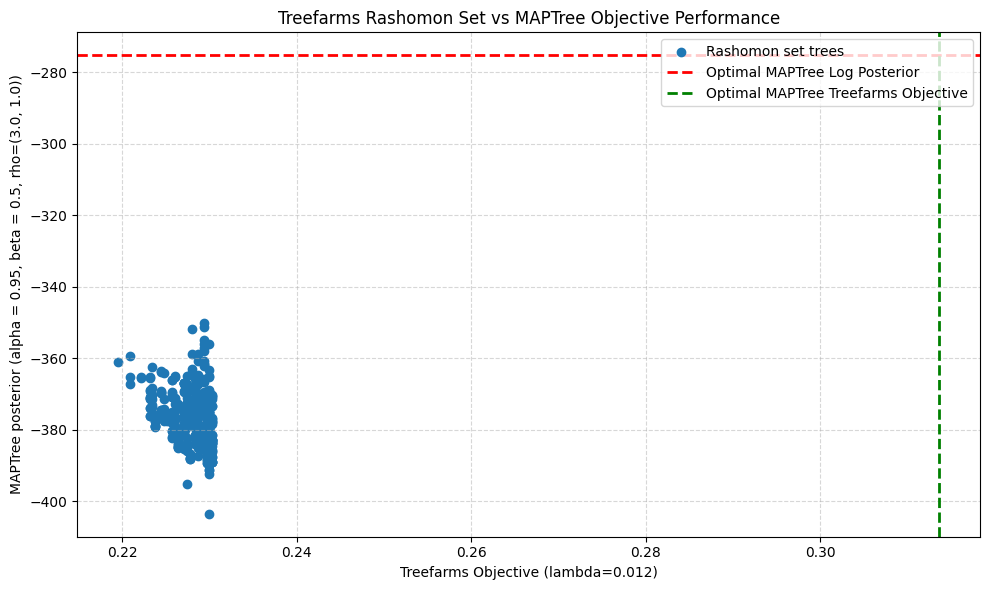

In [251]:
# For lambda = 0.012

for i in range(len(param_grid)):
    opt_maptree_post = maptree_res[i]["score"]
    maptree_tf_obj = maptree_params_dict_train[i+4]["tf_obj"]["0.012"]
    # get rashomon set tree posts with particular values of alpha, beta, rho
    target_values = param_grid[i]
    filtered_dict = {
        k: v for k, v in results_dict6.items()
        if k[1:] == target_values
    }
    plt.figure(figsize=(10,6))
    plt.scatter(ttt_treefarms_rset_objs_train3.values(),
            filtered_dict.values(), label = "Rashomon set trees"
            )
    plt.axhline(opt_maptree_post, color='red', linestyle='--', linewidth=2, label='Optimal MAPTree Log Posterior')
    plt.axvline(maptree_tf_obj, color='green', linestyle='--', linewidth=2, label='Optimal MAPTree Treefarms Objective')
    plt.title("Treefarms Rashomon Set vs MAPTree Objective Performance")
    plt.xlabel("Treefarms Objective (lambda=0.012)")
    plt.ylabel(f"MAPTree posterior (alpha = {param_grid[i][0]}, beta = {param_grid[i][1]}, rho={param_grid[i][2]})")
    plt.legend(loc = "upper right")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()